In [ ]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,BatchNormalization



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# list for image with the tumor
import numpy as np
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
encoder.fit([[0], [1]])

data = []
paths = []
output =[]

for r,d,f in os.walk(r'/content/drive/My Drive/brain_tumor_dataset/yes'):

    for file in f:
        if '.jpg' in file:
          paths.append(os.path.join(r,file))

for path in paths:
    img = Image.open(path)
    img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
      data.append(np.array(img))
      output.append(encoder.transform([[0]]).toarray())


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
#list of image without tumor

paths=[]
for r,d,f in os.walk(r'/content/drive/My Drive/brain_tumor_dataset/no'):

  for file in f:
    if '.jpg' in file:
      paths.append(os.path.join(r,file))

  for path in paths:
    img = Image.open(path)
    img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
      data.append(np.array(img))
      output.append(encoder.transform([[1]]).toarray())

In [ ]:
data = np.array(data)
# print(data.shape)
data.shape

(0,)

In [ ]:
print(f'total number of image we have:{len(data)}')

total number of image we have:0


In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

plt.style.use('dark_background')

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoder.fit([[0], [1]])

data = []
output = []

# Function to load images
def load_images(directory, label):
    paths = []
    for r, d, f in os.walk(directory):
        for file in f:
            if file.lower().endswith('.jpg'):
                paths.append(os.path.join(r, file))

    for path in paths:
        try:
            img = Image.open(path)
            img = img.resize((128, 128))
            img = np.array(img)
            if img.shape == (128, 128, 3):
                data.append(img)
                output.append(encoder.transform([[label]])[0])
        except Exception as e:
            print(f"Error loading image {path}: {e}")

# Load images with tumor
load_images('/content/drive/My Drive/brain_tumor_dataset/yes', 0)

# Load images without tumor
load_images('/content/drive/My Drive/brain_tumor_dataset/no', 1)

# Convert to numpy arrays
data = np.array(data)
output = np.array(output)

print(f'Total images: {data.shape[0]}')
print(f'Total labels: {output.shape[0]}')

# # Display a few images to check if they are loaded correctly
# def display_images(images, labels, num_images=5):
#     plt.figure(figsize=(15, 5))
#     for i in range(num_images):
#         plt.subplot(1, num_images, i + 1)
#         plt.imshow(images[i])
#         plt.title('Tumor' if np.argmax(labels[i]) == 0 else 'No Tumor')
#         plt.axis('off')
#     plt.show()

# # Display 5 random images
# if data.shape[0] > 0:
#     display_images(data, output)
# else:
#     print("No images to display.")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Total images: 213
Total labels: 213


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, output, test_size=0.2,shuffle = True ,random_state=0)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (170, 128, 128, 3) (170, 2)
Testing set shape: (43, 128, 128, 3) (43, 2)


In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2,2),input_shape=(128,128,3),padding='same'))
model.add(Conv2D(32,kernel_size=(2,2,),activation = 'relu',padding = 'same'))



model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.22))

model.add(Conv2D(64, kernel_size=(2,2),padding='same'))
model.add(Conv2D(64,  kernel_size=(2,2,),activation = 'relu',padding = 'same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.22))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.40))

model.add(Dense(2,activation='softmax'))

model.compile(loss = 'categorical_crossentropy',optimizer = 'Adamax')
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      416       
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_3 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_12 (Conv2D)          (None, 64, 64, 64)       

In [ ]:
y_train.shape

(170, 2)

In [ ]:
check = model.fit(X_train,y_train,epochs = 25,batch_size=40,verbose=1,validation_data=(X_test,y_test))

Epoch 1/25
5/5 [==============================] - 19s 3s/step - loss: 38.6401 - val_loss: 25.9027
Epoch 2/25
5/5 [==============================] - 12s 2s/step - loss: 15.4989 - val_loss: 93.7503
Epoch 3/25
5/5 [==============================] - 13s 2s/step - loss: 7.7025 - val_loss: 21.4790
Epoch 4/25
5/5 [==============================] - 13s 2s/step - loss: 6.4702 - val_loss: 4.8424
Epoch 5/25
5/5 [==============================] - 14s 3s/step - loss: 3.1511 - val_loss: 13.6939
Epoch 6/25
5/5 [==============================] - 14s 3s/step - loss: 1.9982 - val_loss: 12.3621
Epoch 7/25
5/5 [==============================] - 14s 3s/step - loss: 0.6695 - val_loss: 7.0418
Epoch 8/25
5/5 [==============================] - 14s 3s/step - loss: 1.4005 - val_loss: 7.7721
Epoch 9/25
5/5 [==============================] - 13s 3s/step - loss: 0.4856 - val_loss: 10.0632
Epoch 10/25
5/5 [==============================] - 13s 2s/step - loss: 0.4608 - val_loss: 8.7181
Epoch 11/25
5/5 [==============

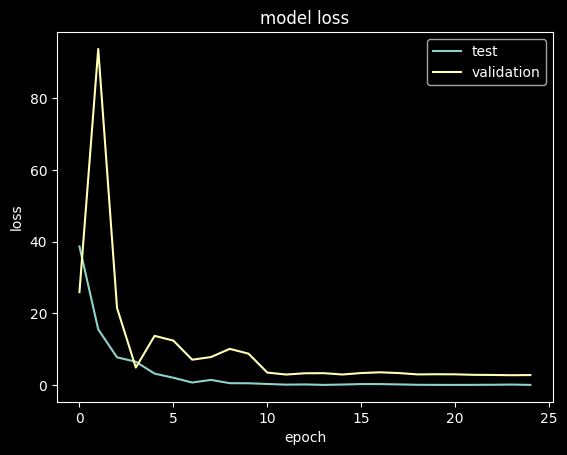

In [ ]:
plt.plot(check.history['loss'])
plt.plot(check.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['test', 'validation'], loc='upper right')
plt.show()

In [ ]:
def names(number):
  if number == 0:
    print('Tumor')
  else:
    print('No Tumor')

Tumor


TypeError: can only concatenate str (not "NoneType") to str

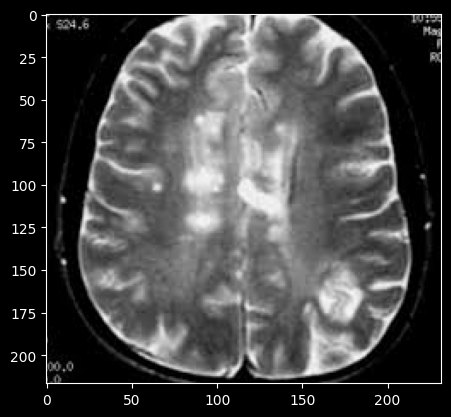

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/brain_tumor_dataset/no/15 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
# print(str(res[0][classification]*100)+'% Confidence This is'+names(classification))
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

71.26018404960632% Confidence This Is No Tumor


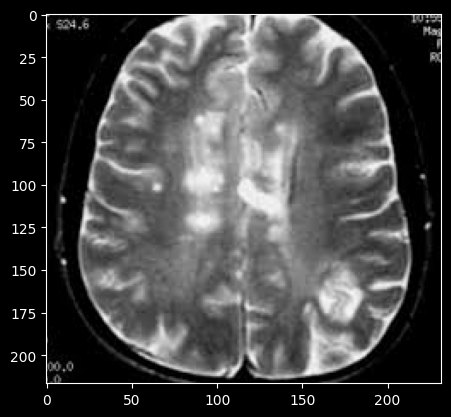

In [ ]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

# Assuming model is already defined and loaded
# Assuming names is a function or a list that maps classification indices to class names

def names(classification):
    # Replace this with your actual logic to get the name from the classification index
    # For example, if you have a list of class names:
    class_names = ["No Tumor", "Tumor"]
    return class_names[classification] if classification < len(class_names) else "Unknown"

# Load and preprocess the image
img = Image.open(r"/content/drive/MyDrive/brain_tumor_dataset/no/15 no.jpg")
x = np.array(img.resize((128, 128)))
x = x.reshape(1, 128, 128, 3)

# Predict the classification
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]

# Display the image and classification result
imshow(img)
print(str(res[0][classification] * 100) + '% Confidence This Is ' + names(classification))
